In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io as sio

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# City Centre 데이터셋

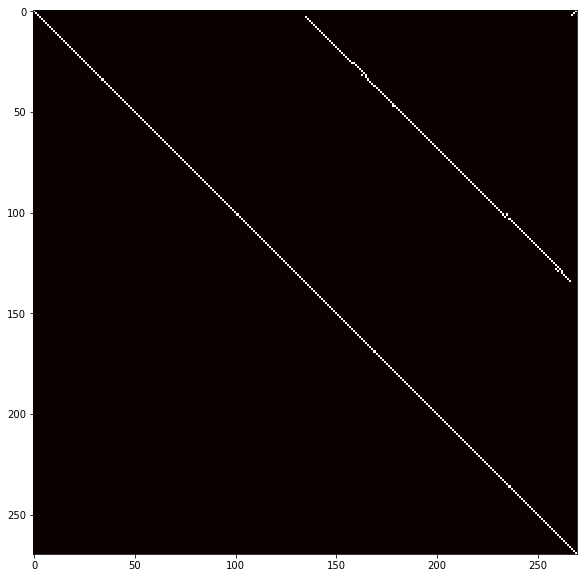

In [12]:
# survey_final
cc_real_corr_list = [[297, 2450], [350, 1398], [351, 1399], [352, 1400], [353, 1401], [355, 1403], [385, 1441], [390, 1448], [392, 1450], [393, 1451], [394, 1452], [395, 1453], [400, 1460], [401, 1461], [525, 1601], [527, 1603], [528, 1604], [530, 1608], [531, 1609], [532, 1610], [535, 1611], [535, 1613], [536, 1614], [537, 1615], [538, 1616], [539, 1617], [540, 1618], [541, 1619], [543, 1619], [544, 1620], [545, 1621], [547, 1623], [701, 1769], [703, 1771], [705, 1773], [707, 1775], [749, 1819], [853, 1929], [939, 2017], [940, 2018], [941, 2019], [942, 2020], [943, 2021], [944, 2022], [945, 2023], [946, 2024], [947, 2025], [948, 2026], [949, 2027], [950, 2028], [951, 2029], [952, 2030], [953, 2031], [954, 2032], [955, 2033], [956, 2034], [957, 2035], [958, 2036], [959, 2037], [960, 2038], [961, 2039], [962, 2040], [963, 2041], [964, 2042], [965, 2043], [985, 2063], [986, 2064], [987, 2065], [988, 2066], [989, 2067], [990, 2068], [991, 2069], [992, 2070], [993, 2071], [994, 2072], [995, 2073], [996, 2074], [1002, 2080], [1003, 2081], [1004, 2082], [1005, 2083], [1073, 2149], [1148, 2222], [1205, 2283], [1206, 2284], [1207, 2285], [1216, 2294], [1225, 2303], [1226, 2304], [1227, 2305], [1228, 2306], [1228, 2308], [1229, 2307], [1230, 2310], [1231, 2311], [1232, 2312], [1241, 2319], [1242, 2320], [1243, 2321], [1244, 2322], [1245, 2323], [1247, 2325], [1248, 2326], [1275, 2355], [1284, 2362], [1285, 2363], [1286, 2364], [1287, 2365], [1288, 2366], [1289, 2367], [1290, 2368], [1291, 2369], [1296, 2374], [1300, 2378], [1301, 2379], [1302, 2378], [1302, 2380], [1303, 2379], [1303, 2381], [1305, 2381], [1306, 2382], [1348, 2428], [295, 2452], [299, 2448], [354, 1402], [384, 1440], [389, 1447], [391, 1449], [541, 1617], [702, 1770], [704, 1772], [706, 1774], [709, 1777], [748, 1818], [750, 1819], [750, 1820], [1233, 2313], [1273, 2353], [1274, 2354], [1345, 2425], [1347, 2427]]
image_idx_order = np.unique(cc_real_corr_list)

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in cc_real_corr_list:
            GT_corr_mat[a,b] = 1


plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

In [13]:
def PrecisionRecalCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())

    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()

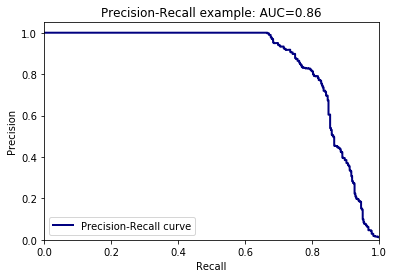

In [15]:
# city centre, gist 방법
mat_contents = sio.loadmat('C:/Users/Dong-Won Shin/Desktop/gistdescriptor/gistdesc_cc.mat')
corr_matrix = mat_contents['est_corr_mat']
PrecisionRecalCurve(GT_corr_mat, corr_matrix)

# New College 데이터셋

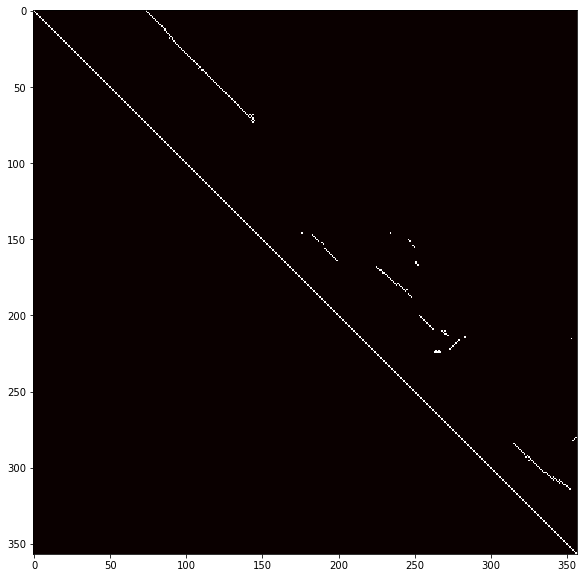

In [16]:
# new college 데이터
nc_real_corr_list = [[1, 187], [2, 188], [5, 193], [7, 195], [8, 196], [9, 197], [10, 198], [11, 199], [12, 200], [13, 201], [14, 202], [15, 203], [16, 204], [18, 204], [19, 205], [20, 206], [21, 207], [22, 208], [23, 207], [23, 209], [25, 209], [30, 214], [31, 215], [32, 216], [33, 217], [34, 218], [49, 237], [50, 238], [53, 241], [69, 255], [70, 256], [71, 257], [72, 258], [73, 259], [74, 260], [75, 261], [76, 262], [77, 263], [79, 263], [80, 266], [80, 268], [81, 269], [82, 270], [83, 271], [84, 272], [85, 273], [86, 274], [87, 275], [88, 276], [89, 277], [90, 278], [91, 279], [108, 298], [109, 299], [110, 300], [111, 301], [112, 302], [113, 303], [114, 304], [157, 347], [158, 348], [161, 351], [162, 352], [163, 353], [164, 354], [165, 355], [166, 356], [167, 357], [168, 358], [169, 359], [169, 361], [170, 360], [171, 361], [173, 363], [174, 362], [174, 364], [175, 363], [398, 548], [398, 944], [405, 561], [406, 562], [407, 563], [408, 564], [408, 962], [409, 565], [409, 963], [411, 567], [412, 568], [413, 965], [414, 966], [415, 569], [431, 587], [432, 588], [433, 589], [434, 590], [435, 591], [436, 592], [437, 593], [438, 594], [442, 994], [444, 994], [445, 995], [499, 897], [518, 908], [520, 910], [520, 912], [522, 916], [524, 916], [524, 918], [545, 941], [546, 942], [547, 943], [548, 944], [549, 945], [550, 946], [551, 947], [551, 949], [552, 948], [552, 950], [553, 951], [560, 958], [561, 959], [561, 961], [562, 960], [564, 962], [565, 963], [566, 964], [603, 1001], [604, 1002], [605, 1003], [606, 1004], [607, 1005], [608, 1006], [609, 1007], [610, 1008], [611, 1009], [612, 1010], [652, 1050], [652, 1052], [653, 1051], [655, 1053], [662, 1058], [793, 1924], [870, 1038], [870, 1040], [871, 1037], [871, 1038], [871, 1039], [871, 1040], [871, 1041], [1122, 1925], [1178, 1602], [1179, 1603], [1180, 1604], [1181, 1605], [1182, 1606], [1183, 1607], [1184, 1608], [1185, 1609], [1187, 1611], [1188, 1610], [1188, 1612], [1189, 1613], [1190, 1612], [1190, 1614], [1219, 1645], [1220, 1646], [1221, 1647], [1222, 1648], [1223, 1649], [1224, 1650], [1290, 1710], [1292, 1712], [1292, 1714], [1293, 1715], [1294, 1716], [1295, 1717], [1295, 1719], [1296, 1718], [1296, 1720], [1297, 1719], [1297, 1721], [1297, 1723], [1298, 1722], [1298, 1724], [1299, 1723], [1299, 1725], [1300, 1726], [1300, 1728], [1301, 1731], [1303, 1733], [1307, 1736], [78, 264], [169, 363], [170, 362], [171, 363], [655, 1052], [762, 1158], [819, 1098], [822, 1095], [824, 1093], [843, 1076], [845, 1074], [847, 1072], [850, 1069], [1107, 1938], [1115, 1932]]
image_idx_order = np.unique(nc_real_corr_list)

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in nc_real_corr_list:
            GT_corr_mat[a,b] = 1


plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

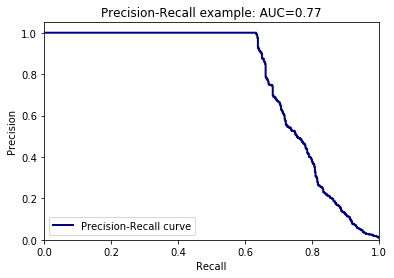

In [18]:
# new college, gist 방법
mat_contents = sio.loadmat('C:/Users/Dong-Won Shin/Desktop/gistdescriptor/gistdesc_nc.mat')
corr_matrix = mat_contents['est_corr_mat']
PrecisionRecalCurve(GT_corr_mat, corr_matrix)

# KA(East) 데이터셋

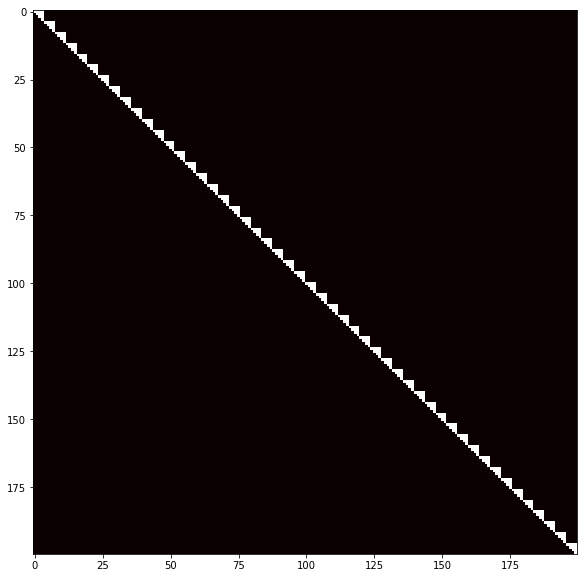

In [23]:
TARGET_EVAL_DATASET = 'KAIST_All_Day(East)'
from glob import glob
images = glob('d:/Datasets/KAIST_All_Day/Synced_Data/small_size/%s/*.jpg' % TARGET_EVAL_DATASET)
    
GT_corr_mat = np.zeros((len(images), len(images)))
for i in range(0,len(images),4):
    for j in range(i,i+4):
        GT_corr_mat[i,j] = 1
    for j in range(i+1,i+4):
        GT_corr_mat[i+1,j] = 1
    for j in range(i+2,i+4):
        GT_corr_mat[i+2,j] = 1
    for j in range(i+3,i+4):
        GT_corr_mat[i+3,j] = 1
        
plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

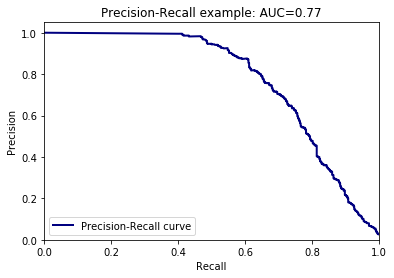

In [24]:

mat_contents = sio.loadmat('C:/Users/Dong-Won Shin/Desktop/gistdescriptor/gistdesc_KA_East.mat')
corr_matrix = mat_contents['est_corr_mat']
PrecisionRecalCurve(GT_corr_mat, corr_matrix)

# KA(West) 데이터셋

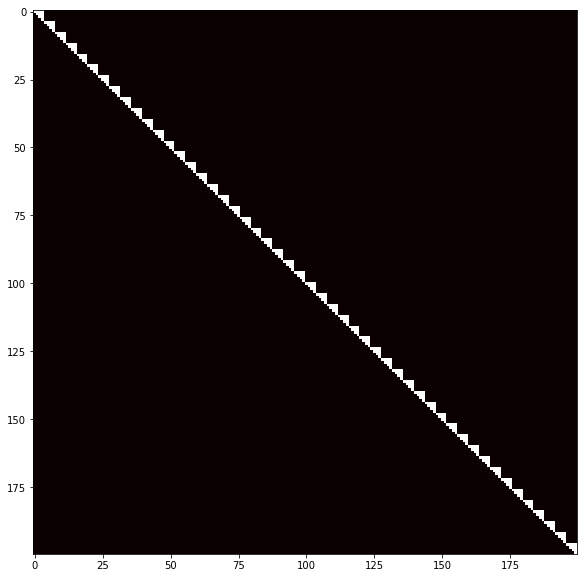

In [25]:
TARGET_EVAL_DATASET = 'KAIST_All_Day(West)'
from glob import glob
images = glob('d:/Datasets/KAIST_All_Day/Synced_Data/small_size/%s/*.jpg' % TARGET_EVAL_DATASET)
    
GT_corr_mat = np.zeros((len(images), len(images)))
for i in range(0,len(images),4):
    for j in range(i,i+4):
        GT_corr_mat[i,j] = 1
    for j in range(i+1,i+4):
        GT_corr_mat[i+1,j] = 1
    for j in range(i+2,i+4):
        GT_corr_mat[i+2,j] = 1
    for j in range(i+3,i+4):
        GT_corr_mat[i+3,j] = 1
        
plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

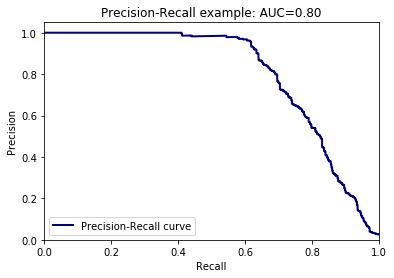

In [26]:

mat_contents = sio.loadmat('C:/Users/Dong-Won Shin/Desktop/gistdescriptor/gistdesc_KA_West.mat')
corr_matrix = mat_contents['est_corr_mat']
PrecisionRecalCurve(GT_corr_mat, corr_matrix)

# KA(North) 데이터셋

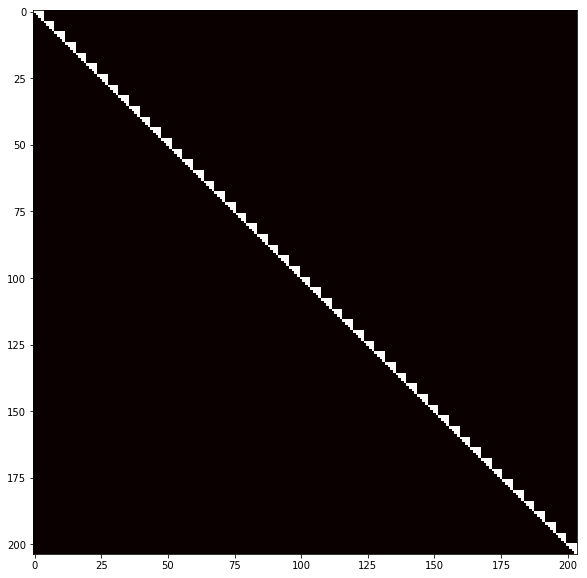

In [29]:
TARGET_EVAL_DATASET = 'KAIST_All_Day(North)'
from glob import glob
images = glob('d:/Datasets/KAIST_All_Day/Synced_Data/small_size/%s/*.jpg' % TARGET_EVAL_DATASET)
    
GT_corr_mat = np.zeros((len(images), len(images)))
for i in range(0,len(images),4):
    for j in range(i,i+4):
        GT_corr_mat[i,j] = 1
    for j in range(i+1,i+4):
        GT_corr_mat[i+1,j] = 1
    for j in range(i+2,i+4):
        GT_corr_mat[i+2,j] = 1
    for j in range(i+3,i+4):
        GT_corr_mat[i+3,j] = 1
        
plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

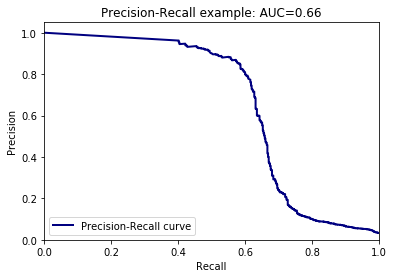

In [30]:

mat_contents = sio.loadmat('C:/Users/Dong-Won Shin/Desktop/gistdescriptor/gistdesc_KA_North.mat')
corr_matrix = mat_contents['est_corr_mat']
PrecisionRecalCurve(GT_corr_mat, corr_matrix)